## Adaboost Hyperparameters Tutorial

**To know more about adaboost's hyperparameters [Click here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) **

Import Important Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I'm importing **make_circles** dataset from sklearn library
 
Also the **plot_descision_regions** for plotting & visualising the plots from mlxtend library

In [37]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split

**Lets create the data points & plot them**

Note* - enter the same values as mine for same plot

In [38]:
np.random.seed(42)
X,y = make_circles(n_samples=500,
                   shuffle=True,
                   noise=0.35,
                   random_state=42,
                   factor=0.1 )

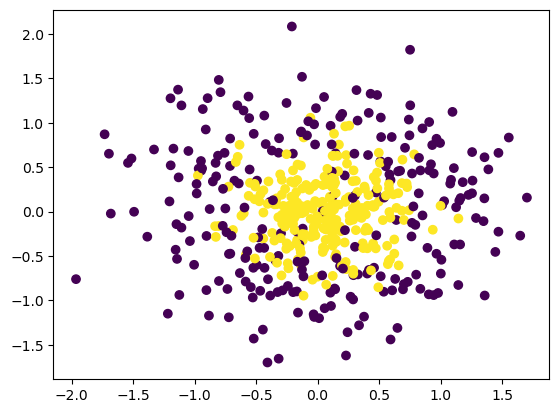

In [39]:
plt.scatter(X[:,0],X[:,1], c=y )

Now importing the **Adaboost Classifier** and **cross validation score** from sklearn lib

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

**I'm creating the object for adaboost classifier without entering its hyperparameter**

In [41]:
abc = AdaBoostClassifier()

In [42]:
np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10) )

0.786

In [43]:
abc.fit(X,y)

AdaBoostClassifier()

In [53]:

def plot_decision_boundary(clf):
    plt.figure(figsize=(14, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    

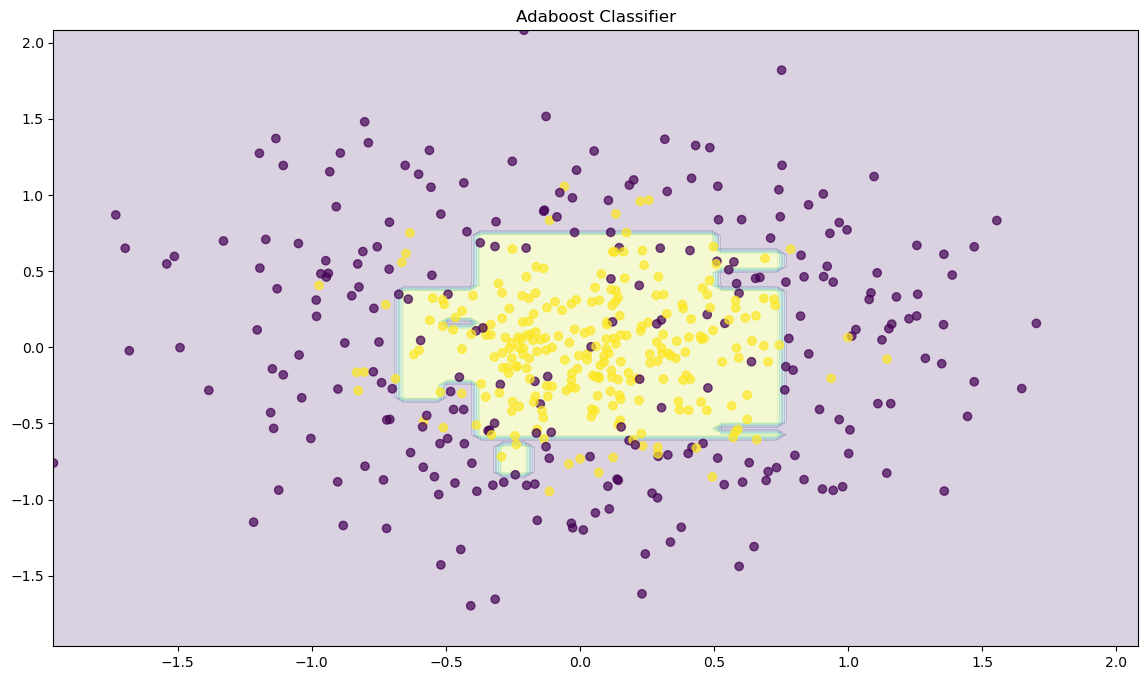

In [54]:
plot_decision_boundary(abc)

we can see from above plot that there are so many points, that are present in each other descision boundaries like blue points are present in yellow region and vice versa.

# ________________________________________________________




### The impact of Learning Rate (L) and the number of weak classifiers (M)

**Decreasing the learning rate** L
This translates into smaller variations of the weighted data points and therefore fewer differences between the weak classifier decision boundaries

**Increasing the number of weak classifiers** M
Increases the number of iterations, and allows the sample weights to gain greater amplitude.

This translates into
1) more weak classifiers to combine at the end
2) more variations in the decision boundaries of these classifiers. Put together these effects tend to lead to more complex overall decision boundaries. 

key takeaways:

1.Too small L or M leads to an overly simplistic boundary. 

2.Making one large and the other small tends to cancel the effect.

3.Making both large gives a good result but may overfit.

.



It would make sense to see a trade-off between the parameters L and M
**Increasing one and decreasing the other will tend to cancel the effect.**

### **Now with hyperparameters**

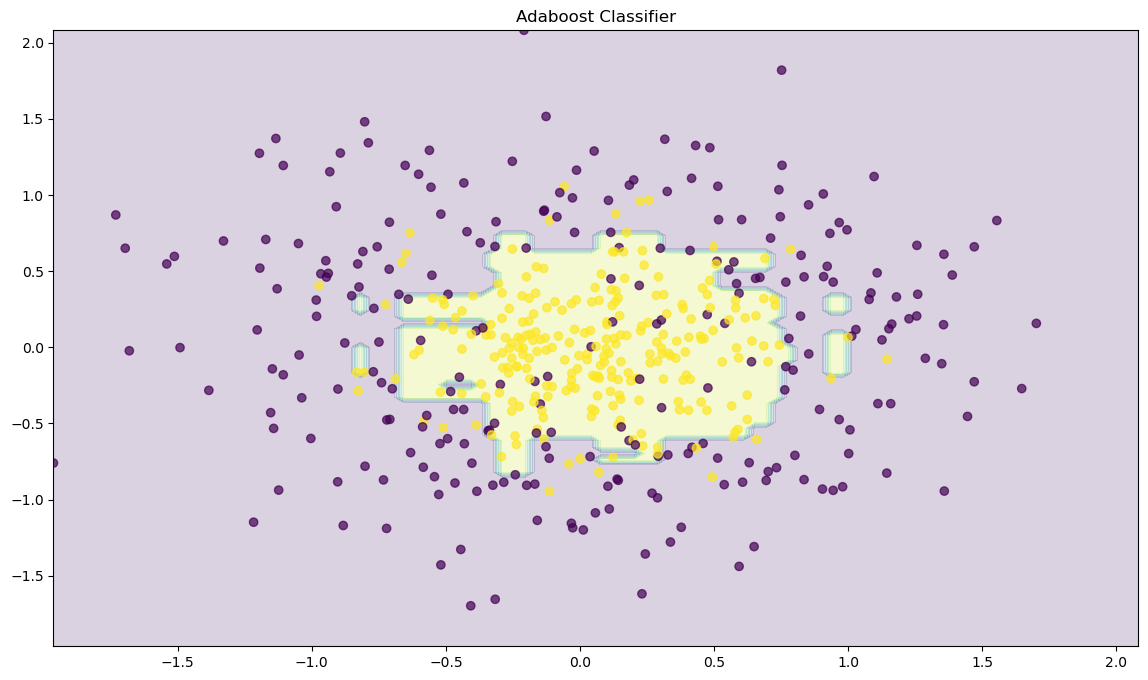

In [58]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

We can clearly see that the above plot is quite better than the previous one but there are instances of overfitting & new descision boundaries apart from the main one which is quite bad for our model.

We can clearly avoid over fitting by increasing the weak classifiers and lowering down the learning rate (optimal values) this is also known as **shrinkage parameter**
tweaking the **n_estimators (no. of weak classifiers) and learning_rate(Learning rate)** we can achieve better results.

## --------------------------------------------------------------

In [66]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500, 1000]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')

In [67]:
# execute the grid search

grid_result = grid_search.fit(X, y)

# summarize the best score and configuration

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


**Result : Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}**

Using the above hyperparameters

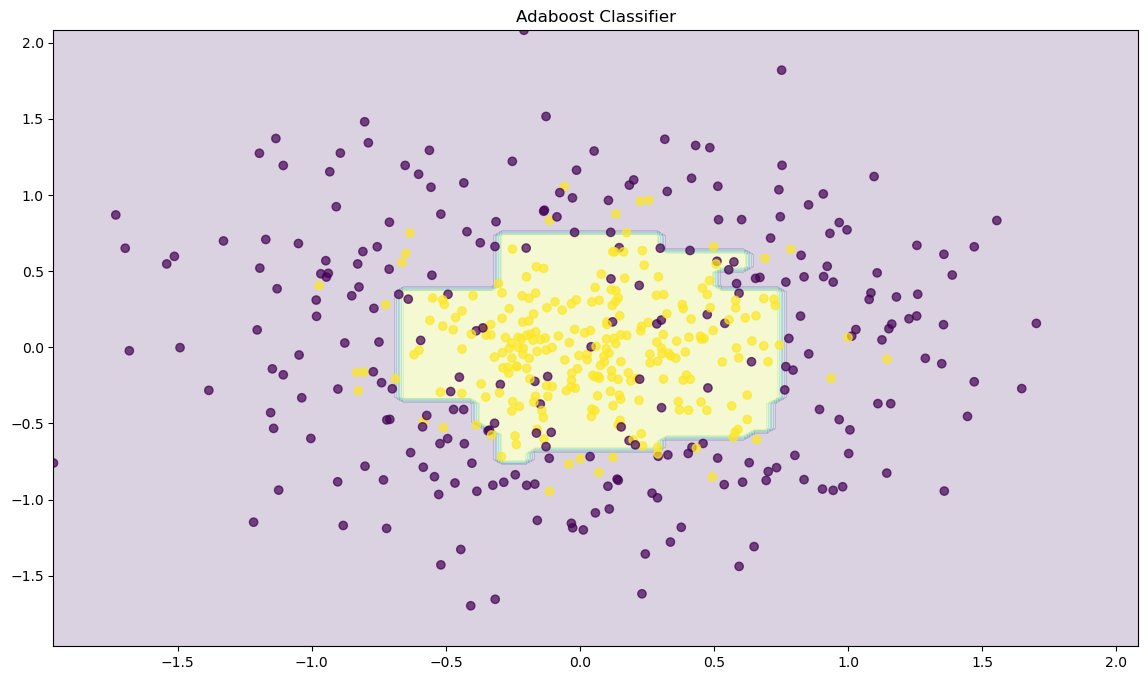

In [68]:
abc = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

## Thank You !!